# Grafos con iPython (via [networkx](http://networkx.github.io/))

Cuando instalamos [anaconda](https://www.continuum.io/), entre los paquetes que tiene incorporados está `networkx`.

Vamos a mostrar cómo utilizarlo para realizar operaciones básicas con grafos

En primer lugar vamos a indicar que queremos los gráficos y las imágenes "en línea"; usaremos `pylab` para ello (podríamos utilizar también `matplotlib`) y `IPython.display`

In [1]:
%pylab inline
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


Ahora cargamos el paquete `networkx` y usamos la abreviatura `nx` (esto se suele hacer para no mezclar funciones con el mismo nombre en distintos paquetes)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Introducción

**Ejemplo** (*Euler*) El problema de los siete puentes de la ciudad de Königsberg, en la antigua Prusia oriental en el siglo XVIII, ciudad natal de Kant y, actualmente Kaliningrado (Rusia) es un célebre problema matemático que fue resuelto por Leonhard Euler en 1736 y dio origen a la Teoría de Grafos.

La ciudad estaba dividida en cuatro zonas por el río Pregel. Estas cuatro zonas estaban unidas por siete puentes. Los habitantes de la ciudad, durante sus paseos, intentaban encontrar una ruta que cruzase cada uno de los siete puentes una sola vez, y acabase en el mismo lugar que habían empezado.

Euler enfocó el problema representando las cuatro partes de tierra por un punto y cada uno de los siete puentes por una línea, uniendo los puntos que se corresponden. Entonces, el problema anterior se puede trasladar a la siguiente pregunta: ¿se puede recorrer el dibujo terminando en el punto de partida sin repetir las líneas?

El grafo asociado al problema de los puentes de Könisberg es el siguiente.

In [101]:
A = nx.MultiGraph()
A.add_node('A')
A.add_node('I')
A.add_node('B')
A.add_node('C')
A.add_edge('A','I')
A.add_edge('A','I')
A.add_edge('I','B')
A.add_edge('I','B')
A.add_edge('A','C')
A.add_edge('I','C')
A.add_edge('B','C')

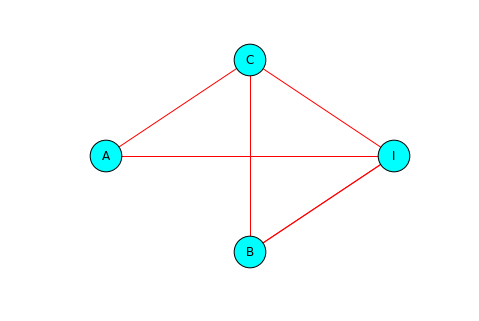

In [102]:
nx.draw(A,node_color='cyan',node_size=1000,
        edge_color='red',pos=nx.circular_layout(A),
        with_labels=True)

In [103]:
import nxpd

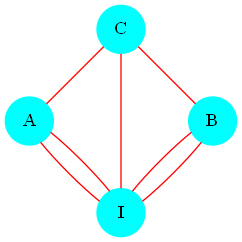

In [104]:
nx.set_node_attributes(A,'color','cyan')
nx.set_node_attributes(A,'shape','circle')
nx.set_node_attributes(A,'style','filled')
nx.set_edge_attributes(A,'color','red')
nxpd.draw(A,show='ipynb',layout='circo')

# Grafo predefinido

Creamos nuestro primer grafo. El paquete `networkx` ya tiene predefinidos muchos de los que solemos utilizar. En este caso vamos a trabajar con $K_5$, el grafo completo con cinco vértices

In [105]:
K5=nx.complete_graph(5)

Podemos, por ejemplo, pintarlo (y como dijimos arriba que los dibujos serían "en línea", éstos aparecerán en este mismo bloc)

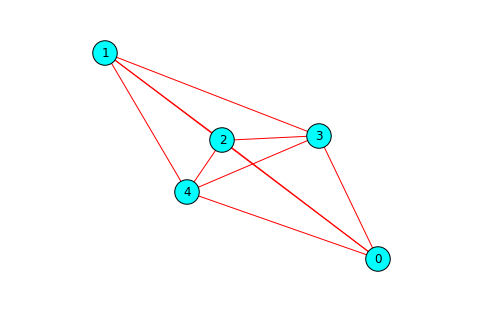

In [106]:
nx.draw_spring(K5,node_color='cyan',node_size=600,edge_color='red',with_labels=True)

Podemos alterar la forma de dibujar el grafo. Por ejemplo, podemos organizar los vértices en un círculo.

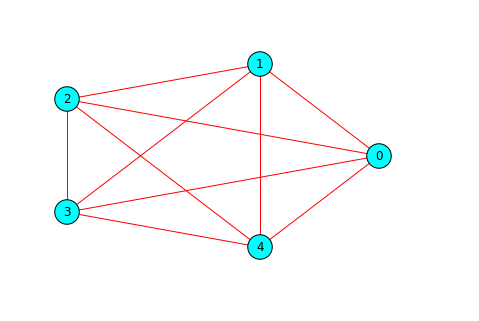

In [107]:
nx.draw_circular(K5,node_color='cyan',node_size=600,edge_color='red',with_labels=True)

Cada grafo, como objeto, tiene una serie de atributos y métodos específicos implementados para él. Por ejemplo, el grado de sus vértices. La salida es un diccionario, pero es fácil acceder a los valores de los grados.

Llamaremos orden del grafo a |V|. El número de aristas, se denomina tamaño del grafo y se denota por |E|.

In [108]:
K5.size()

10

In [109]:
K5.order()

5

In [110]:
K5.nodes()

[0, 1, 2, 3, 4]

In [111]:
K5.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

Los vértices adyacentes (esto es, conectados a uno dado) los conseguimos con la orden `neighbors`

In [112]:
K5.neighbors(0)

[1, 2, 3, 4]

La sucesión de grados la obtenemos de la siguiente manera:

In [113]:
sorted(K5.degree().values())

[4, 4, 4, 4, 4]

Las componentes conexas también son fáciles de calcular.

In [114]:
list(nx.connected_components(K5))

[{0, 1, 2, 3, 4}]

Como era de esperar, es conexo y sólo tiene una componente conexa.

In [115]:
nx.is_connected(K5)

True

# Construir un grafo

Definamos ahora un grafo desde el principio. Primero lo creamos con `Graph`, `MultiGraph`, `DiGraph` y `MultiDiGraph`.

In [119]:
G1=nx.Graph()

Ahora le podemos añadir lados o vértices como queramos. Podemos usar `add_node`, `add_edge` o bien de una lista como hacemos a continuación.

In [120]:
G1.add_edges_from([(1,2),(3,4)])

In [121]:
list(nx.connected_components(G1))

[{1, 2}, {3, 4}]

# Ejercicio

**Ejemplo** (*Generando grafos con características especiales*) Diez personas están sentadas alrededor de una mesa circular. Cada persona estrecha la mano a todos
los demás excepto a la persona sentada directamente enfrente de la mesa. Dibuja un grafo que modele
la situación.

Primero creamos un grafo vacío

In [128]:
G2=nx.Graph()

La estrategia que vamos a seguir es crear los lados a partir de parejas. Éstas son elementos $(p,q)$ del producto cartesiano $\{0,\ldots, 9\}^2$ tales que $5\mid p-q$. Para el producto cartesiano vamos a utilizar iteradores, y por ello cargamos `itertools`.

In [129]:
import itertools

En la variable `c` vamos a guardar el producto cartesiano $\{0,\ldots, 9\}^2$

In [130]:
c=list(itertools.product(range(10), repeat=2))

Y ahora seleccionamos las parejas que verifican la condición que impusimos arriba. El conjunto (en este caso hacemos una lista) $e=\{ (a,b)\in c \mid (a-b)\not\equiv 0\ \mathrm{mod}\ 5\}$ lo podemos expresar de la siguente forma:

In [131]:
e=[p for p in c if ((p[0]-p[1])%5)!=0]

Y añadimos estos lados a nuestro grafo.

In [132]:
G2.add_edges_from(e)

Ya estamos en condiciones de pintarlo; y lo haremos con etiquetas los nodos del grafo.

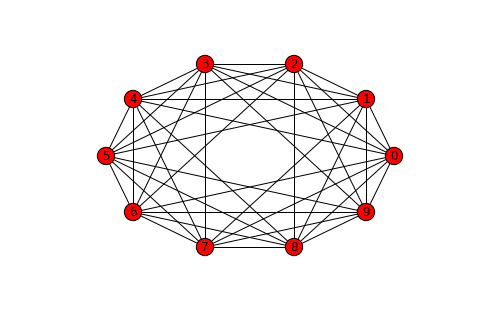

In [133]:
nx.draw(G2,with_labels=True,pos=nx.circular_layout(G2))

# Isomorfismo de grafos

**Ejemplo** (*Grafos isomorfos*) Vamos a ver si dos grafos dados son isomorfos. Tomemos como $G_1$ el grafo $K_5$ quitando los lados $\overline{13}$ y $\overline{14}$; y $G_2$ el grafo $K_5$ al que quitamos los lados $\overline{03}$ y $\overline{25}$

In [134]:
G1=nx.complete_graph(5)

In [135]:
G2=G1.copy()

In [136]:
G1.remove_edges_from([(1,3),(1,4)])
G2.remove_edges_from([(0,3),(2,5)])

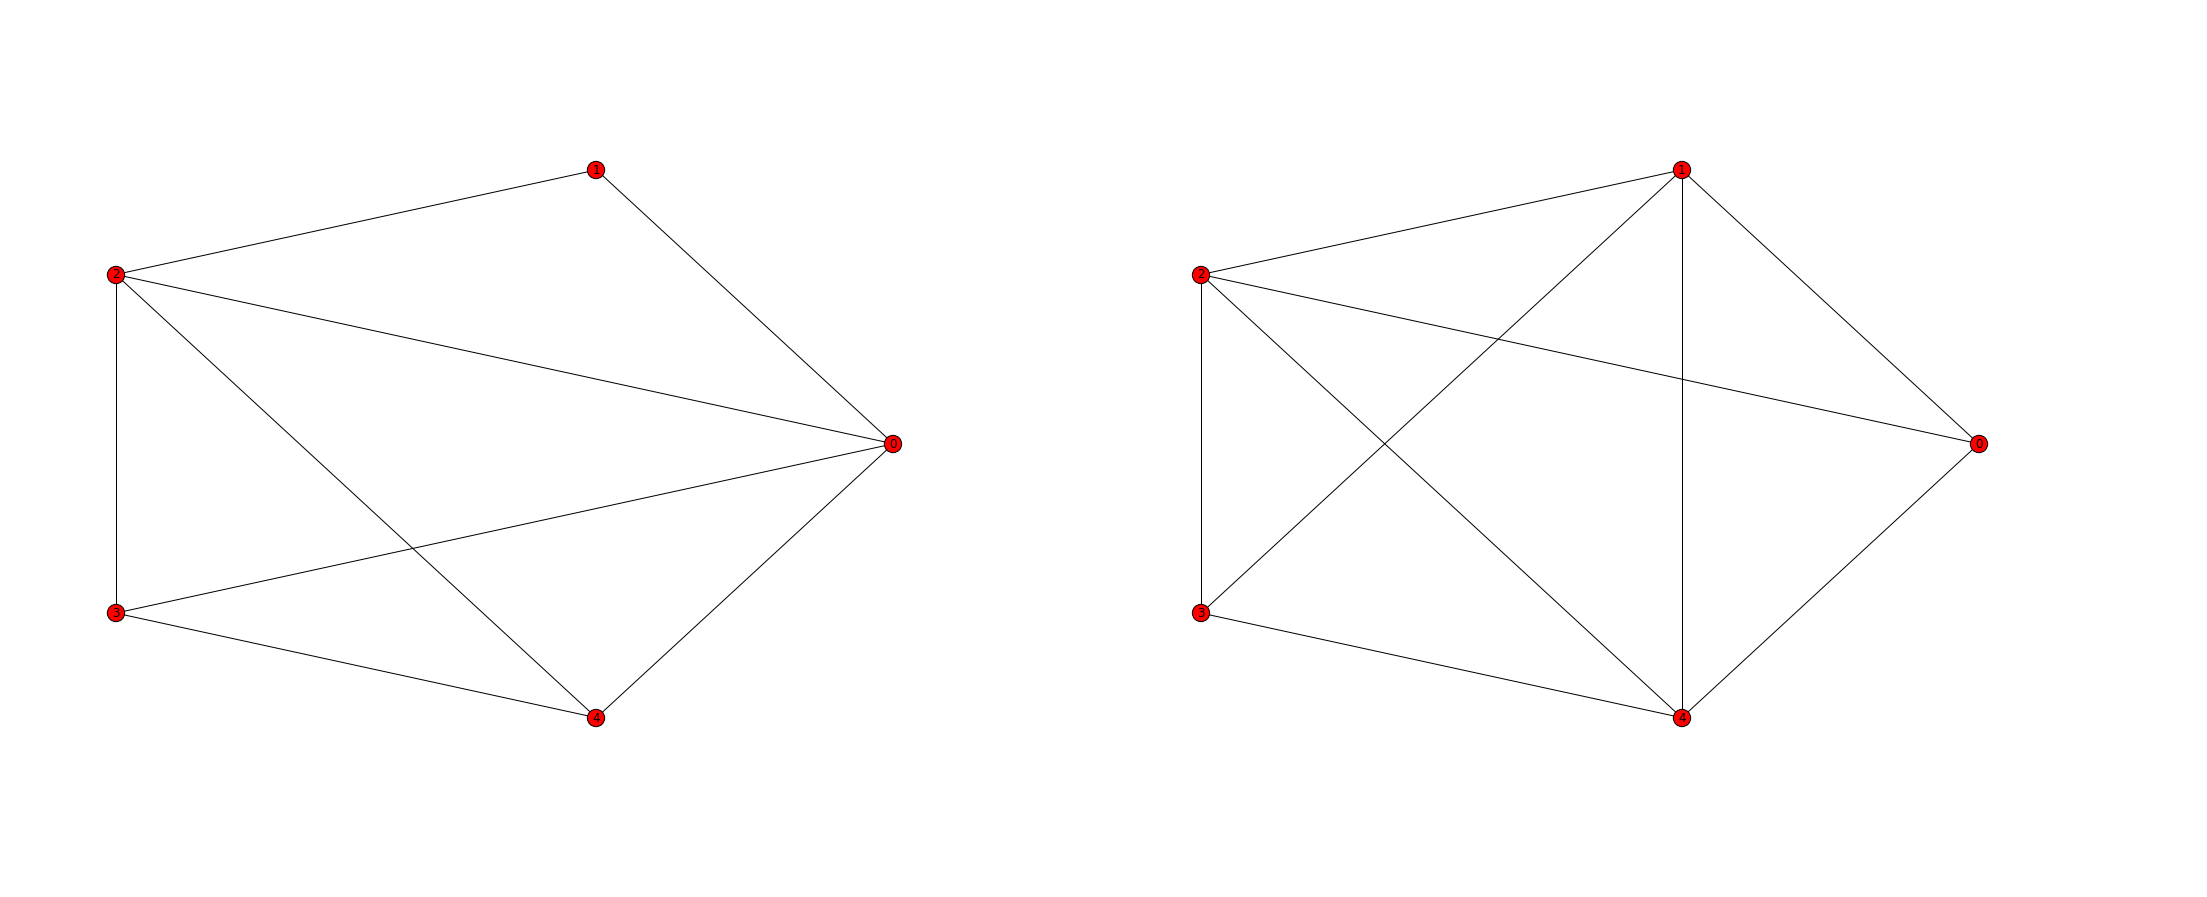

In [137]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=3,wspace=0.01,hspace=1)
plt.subplot(1,2,1)
d1=nx.draw_circular(G1,with_labels=True)
plt.subplot(1,2,2)
d2=nx.draw_circular(G2,with_labels=True)
show()

In [138]:
nx.is_isomorphic(G1,G2)

False

Lo cual es normal, pues las secuencias de grados no son las mismas ni después de reordenar.

In [139]:
sorted(G1.degree().values())

[2, 3, 3, 4, 4]

In [140]:
sorted(G2.degree().values())

[3, 3, 4, 4, 4]

**Ejemplo** (*Clasificación salvo isomorfismo*) Vamos a construir todos los subgrafos de $K_4$ salvo isomorfismos.

Nos vamos a centrar en los de cuatro vértices, pues los de tres, dos y uno se pueden extraer de forma análoga a partir de $K_3$, $K_2$ y $K_1$, respectivamente.

In [141]:
G=nx.complete_graph(4)

In [142]:
e=G.edges()

In [143]:
G.size()

6

Creamos una lista con todos los subconjuntons (pasados a lista) del conjunto de lados de G. Para cada lista, iremos creando un grafo eliminando los lados del grafo original que están en esa lista. 
Para no tener que definir una función que nos dé los subconjuntos de un conjunto, usaremos la que hay definida en `sympy`

In [144]:
from sympy import subsets
sub=[list(x) for x in list(subsets(e))]

In [145]:
H=[]
for ls in sub:
    Gt=G.copy();
    Gt.remove_edges_from(ls);
    H.append(Gt);
len(H)

64

Tenemos un total de 64 subgrafos de $K_4$ con 4 vértices. Ahora los clasificamos por clases de equivalencia, donde la relación de equivalencia que consideramos es ser isomorfo.

In [146]:
clases=[]
while H!=[]:
    c=[h for h in H if nx.is_isomorphic(H[0],h)]
    clases.append(c)
    H=[h for h in H if not(h in c)]
len(clases)

11

Por último, pintamos los 11 que nos salen.

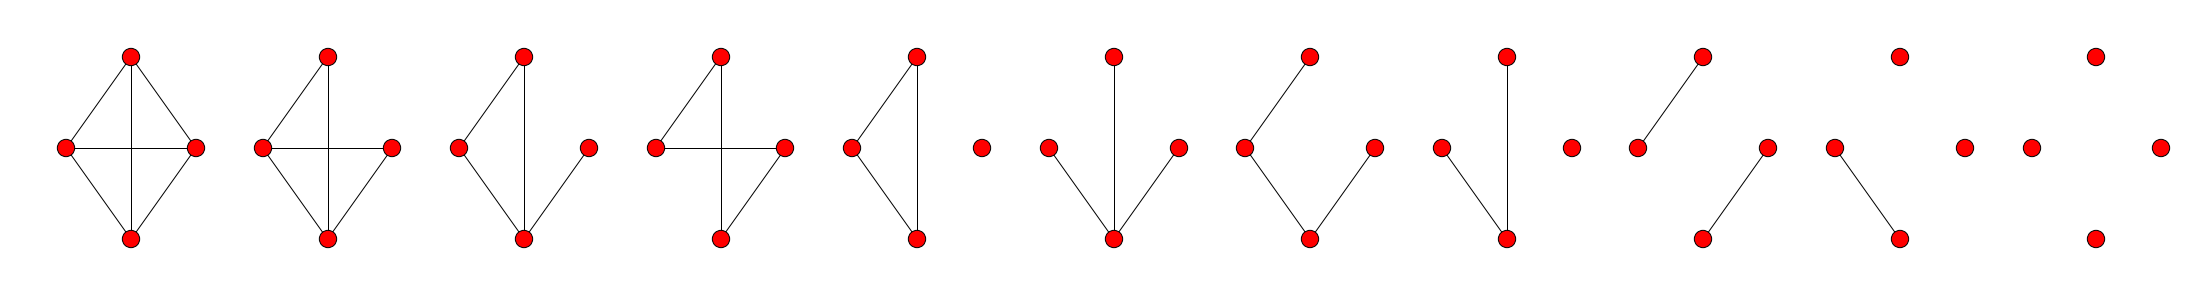

In [147]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=0.95,wspace=0.01,hspace=1)
for i in range(11):
    plt.subplot(1,11,i+1)
    nx.draw_circular(clases[i][0])
show()

# Grafos de Euler

Sea G un grafo, un circuito euleriano es un circuito (esto es, camino cerrado sin aristas repetidas) que contiene todas las aristas de G. Un grafo que admite un circuito euleriano se denomina grafo euleriano.

Un camino de Euler es un camino sin aristas repetidas en el que aparecen todas las aristas.
 

Vamos ahora si $K_5$ es euleriano, y en caso de serlo, vamos a mostrar un circuito de Euler.

In [3]:
K5=nx.complete_graph(5)

In [4]:
nx.is_eulerian(K5)

True

In [5]:
nx.eulerian_circuit(K5)

<generator object eulerian_circuit at 0x0000000007CF6480>

La salida no dice mucho, así que vamos a mostrarla como una lista

In [6]:
list(_)

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

In [7]:
import networkx as nx

def eulerian_path(G):
    """Returns the edges of an Eulerian path in G, (if it exits).
    An Eulerian path is a path that crosses every edge in G
    exactly once.
    Parameters
    ----------
    G: NetworkX Graph, DiGraph, MultiGraph or MultiDiGraph 
        A directed or undirected Graph or MultiGraph.
    Returns
    -------
    edges: generator
        A generator that produces edges in the Eulerian path.
    Raises
    ------
    NetworkXError: If the graph does not have an eulerian path.
    Notes
    -----
    Linear time algorithm, adapted from [1]_ and [3]_.
    Information about euler paths in [2]_.
    Code for eulerian circuit in [3]_.
    Important: In [1], euler path is in reverse order,
    this implementation gives the path in correct order
    as in [3]_ for eulerian_circuit. The distinction for 
    directed graph is in using the in_degree neighbors, not the out
    ones. for undirected, it is using itemgetter(1) for get_vertex, 
    which uses the correct vertex for this order. Also, every graph
    has an even number of odd vertices by the Handshaking Theorem [4]_. 
    References
    ----------
    .. [1] http://www.graph-magics.com/articles/euler.php
    .. [2] http://en.wikipedia.org/wiki/Eulerian_path
    .. [3] https://github.com/networkx/networkx/blob/master/networkx/algorithms/euler.py
    .. [4] https://www.math.ku.edu/~jmartin/courses/math105-F11/Lectures/chapter5-part2.pdf
    
    Examples 
    --------
    >>> G = nx.Graph([('W', 'N'), ('N', 'E'), ('E', 'W'), ('W', 'S'), ('S', 'E')])
    >>> list(nx.find_eulerian_path(G))
    [('W', 'N'), ('N', 'E'), ('E', 'W'), ('W', 'S'), ('S', 'E')]
    >>> G = nx.Digraph([(1, 2), (2, 3)])
    >>> list(nx.find_eulerian_path(G))
    [(1,2),(2,3)]
    """
    from operator import itemgetter 

    # Verify that graph is connected, short circuit
    if G.is_directed() and not nx.is_weakly_connected(G):
        raise nx.NetworkXError("G is not connected.")    

    # is undirected
    if not G.is_directed() and not nx.is_connected(G):
        raise nx.NetworkXError("G is not connected.")

    # Now verify if has an eulerian circuit: even condition of all nodes is satified.
    if nx.is_eulerian(G):
        x = nx.eulerian_circuit(G) # generator of edges
        for i in x:
            yield i
        
    # Not all vertex have even degree, check if exactly two vertex have odd degrees.
    # If yes, then there is an Euler path. If not, raise an error (no euler path can be found)
    else:
        g = G.__class__(G)  # copy graph structure (not attributes)
        
        # list to check the odd degree condition, and a flag
        check_odd = []
        directed = False
    
        if g.is_directed():
            degree = g.in_degree
            out_degree = g.out_degree
            edges = g.in_edges_iter
            get_vertex = itemgetter(0)
            directed = True
        else:
            degree = g.degree
            edges = g.edges_iter
            get_vertex = itemgetter(1)
            
        # Verify if an euler path can be found. Complexity O(n) ?
        for vertex in g.nodes():
            deg = degree(vertex)
            # directed case
            if directed:
                outdeg = out_degree(vertex)
                if deg != outdeg:
                    # if we have more than 2 odd nodes, we do a raise (no euler path)
                    if len(check_odd) > 2:
                        raise nx.NetworkXError("G doesn't have an Euler Path.")
                # is odd and we append it. 
                    else:
                        check_odd.append(vertex)
            # undirected case        
            else:
                if deg % 2 != 0:
                    # if we have more than 2 odd nodes, we do a raise (no euler path)
                    if len(check_odd) > 2:
                        raise nx.NetworkXError("G doesn't have an Euler Path.")
                    # is odd and we append it. 
                    else:
                        check_odd.append(vertex)

        if directed:
            def verify_odd_cond(g,check_odd):
                first = check_odd[0]
                second = check_odd[1]
                if  g.out_degree(first) == g.in_degree(first) + 1 and g.in_degree(second) == g.out_degree(second) + 1:
                    return second
                elif g.out_degree(second) == g.in_degree(second) + 1 and g.in_degree(first)  == g.out_degree(first) + 1:
                    return first
                else:
                    return None
            start = verify_odd_cond(g,check_odd)
        else:
            start = check_odd[0]

        # if the odd condition is not meet, raise an error.
        if not start:
            raise nx.NetworkXError("G doesn't have an Euler Path")
        # Begin algorithm: 
        vertex_stack = [start]
        last_vertex = None

        while vertex_stack:

            current_vertex = vertex_stack[-1] #(4)
            # if no neighbors:
            if degree(current_vertex) == 0:
                # Special case, we cannot add a None vertex to the path.
                if last_vertex is not None:
                    yield (last_vertex, current_vertex)
                last_vertex = current_vertex
                vertex_stack.pop()
            # we have neighbors, so add the vertex to the stack (2), take any of its neighbors (1)
            # remove the edge between selected neighbor and that vertex,
            # and set that neighbor as the current vertex (4).
            else:
                random_edge = next(edges(current_vertex)) #(1)
                vertex_stack.append(get_vertex(random_edge)) #(2)
                g.remove_edge(*random_edge) #(3)


In [8]:
def euler_path(graph):
    # counting the number of vertices with odd degree
    odd = [ x for x in graph.nodes() if graph.degree(x)&1 ]
    odd.append( graph.nodes()[0] )

    if len(odd)>3:
        return []
    
    check_odd = [ odd[0] ]
    path = []
    
    # main algorithm
    while check_odd:
        v = check_odd[-1]
        if graph[v]:
            u = graph[v][0]
            check_odd.append(u)
            # deleting edge u-v
            del graph[u][ graph[u].index(v) ]
            del graph[v][0]
        else:
            path.append( check_odd.pop() )
    
    return path

In [10]:
eulerian_path(K5)

<generator object eulerian_path at 0x0000000007D30AF8>

In [12]:
list(_)

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

# Grafos de Hamilton

Un **ciclo hamiltoniano**  de un grafo G es un camino cerrado que recorre todos los vértices una sola vez.

Un grafo es **hamiltoniano** si tiene un ciclo hamiltoniano.

Un **camino de Hamilton** es un camino simple que recorre todos los vértices una sola vez. 

**Ejemplo** (Hamilton) Vamos a mostrar cómo encontrar un ciclo y un camino Hamiltoniano en un grafo.

In [151]:
def hamilton_cycles(G):
    H=G.to_directed()
    L=nx.simple_cycles(H)
    C=[i for i in L if len(i)==len(G)]
    for i in C:
        i.append(G.nodes()[0])
    return C  

In [152]:
def hamilton_paths(G,source,target):
    L=nx.all_simple_paths(G,source,target)
    C=[i for i in L if len(i)==len(G)]
    return C  

In [153]:
def is_hamiltonian(G):
    F = [(G,[G.nodes()[0]])]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        for node in graph.neighbors(path[-1]):
            conf_p = path[:]
            conf_p.append(node)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p)==n:
                return p
            else:
                F.append((g,p))
    return False

In [154]:
k4=nx.complete_graph(4)

In [155]:
hamilton_cycles(k4)

[[0, 3, 2, 1, 0],
 [0, 3, 1, 2, 0],
 [0, 2, 3, 1, 0],
 [0, 2, 1, 3, 0],
 [0, 1, 3, 2, 0],
 [0, 1, 2, 3, 0]]

In [156]:
k2_4=nx.complete_bipartite_graph(2,4)

In [157]:
hamilton_cycles(k2_4)

[]

# Matriz de adyacencia y matriz de incidencia

Veamos cuál es su matriz de adjacencia. Hay que tener en cuenta que `networkx` las almacena de forma dispersa (posiciones no nulas y valor en éstas), y nosotros estamos acostumbrados a la forma densa (forma matricial).

In [122]:
A=nx.adjacency_matrix(G1)

In [125]:
A.todense()

matrix([[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]], dtype=int32)

In [126]:
B=nx.incidence_matrix(G1)

In [127]:
B.todense()

matrix([[ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 0.,  1.]])

**Ejemplo** (*Grafos a partir de matrices*) Veamos cómo crear un grafo a partir de una matriz de adyacencia. Las matrices aceptadas por `networkx` son matrices `numpy` (el paquete de cálculo numérico)

In [158]:
import numpy
A=numpy.matrix([[0,1,0,1,1],[1,0,1,1,1],[0,1,0,0,0],[1,1,0,0,0],[1,1,0,0,0]])
G=nx.from_numpy_matrix(A)

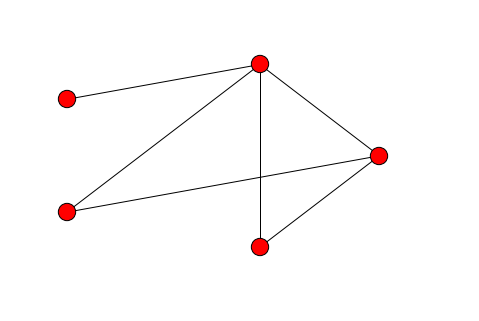

In [159]:
nx.draw_circular(G)

A partir de aquí podemos calcular la de incidencia.

In [160]:
nx.incidence_matrix(G).todense()

matrix([[ 1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  1.]])

# Polinomio cromático

**Ejemplo** (*Polinomio cromático*) Para calcular el polinomio cromático asociado a un grafo $G$, $p(G,x)$, vamos a utilizar la fórmula $p(G,x)=p(G-e,x)-p(G_e,x)$, donde $G-e$ es el grafo que se obtiene a partir de $G$ quitando el lado $e$ y $G_e$ es el grafo resultante de contraer el lado $e$ (identificar sus vértices). El caso base es cuando no hay lados, y en este caso $p(G,x)=x^{|V|}$, con $V$ el conjunto de vértices de $G$.

Ahora, como quiera que vamos a tratar con polinomios, utilizaremos algo para manipular variables y expresiones simbólicas: en este caso usaremos `sympy`. 

Si lo que queremos es el polinomio evaluado en un determinado entero, entonces no necesitamos variable, podemos invocar la función con segundo argumeno el entero deseado.

In [161]:
from sympy import *
x=Symbol("x")
def chromatic_polynomial(G,x):
    lados=G.edges();
    if len(lados)==0:
        return x**len(G.nodes());
    l=lados[0];
    Gl=G.copy();
    Gl.remove_edges_from([l]);
    Glp=nx.contracted_edge(G,l,self_loops=False)
    return chromatic_polynomial(Gl,x)-chromatic_polynomial(Glp,x);

In [162]:
g=nx.complete_graph(5)

In [163]:
chromatic_polynomial(g,x)

x**5 - 10*x**4 + 35*x**3 - 50*x**2 + 24*x

In [164]:
factor(_)

x*(x - 4)*(x - 3)*(x - 2)*(x - 1)

In [165]:
def chromatic_number(G):
    if G.number_of_nodes() == 0:
        return 0
    elif G.number_of_edges() == 0:
        return 1
    elif G.number_of_edges() == 1:
        return 2
    else:
        p = chromatic_polynomial(G,x)
        for i in range(max(G.degree().values()) + 2):
            if p.subs(x, i) > 0:
                return i

In [166]:
chromatic_number(g)

5

# Árboles y bosques

**Ejemplo** (*Árboles, y bosques*) En `networkx` tenemos varias funciones dedicadas a árboles. Veamos ejemplos de algunas de ellos.

In [62]:
k5=nx.complete_graph(5)

In [63]:
t=nx.minimum_spanning_tree(k5)

In [64]:
def hierarchy_pos(G, root, width=0.5, vert_gap=0.1, vert_loc=0, xcenter=0.5):
    '''If there is a cycle that is reachable from root, then result will not be a hierarchy.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
    '''

    def h_recur(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5,
                  pos=None, parent=None, parsed=[]):
        if(root not in parsed):
            parsed.append(root)
            if pos == None:
                pos = {root:(xcenter, vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
            neighbors = G.neighbors(root)
            if parent != None:
                neighbors.remove(parent)
            if len(neighbors) != 0:
                dx = width / len(neighbors)
                nextx = xcenter - width / 2 - dx / 2
                for neighbor in neighbors:
                    nextx += dx
                    pos = h_recur(G, neighbor, width=dx, vert_gap=vert_gap,
                                        vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos,
                                        parent=root, parsed=parsed)
        return pos

    return h_recur(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5)

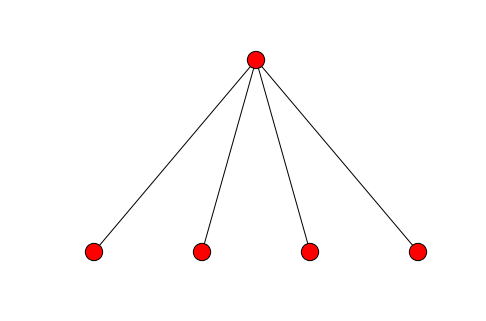

In [65]:
nx.draw(t,pos=hierarchy_pos(t,0))

In [66]:
nx.is_tree(t)

True

Dibujemos todos los árboles con 5 nodos.

In [67]:
import networkx as nx
L=list(nx.nonisomorphic_trees(5))

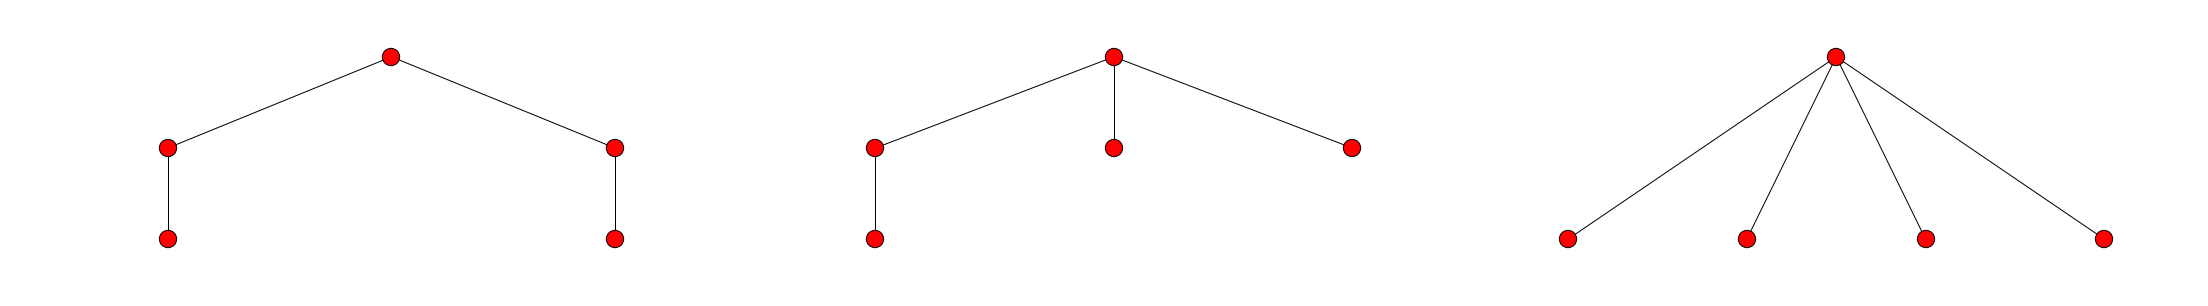

In [68]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=0.95,wspace=0.01,hspace=1)
for i in range(3):
    plt.subplot(1,3,i+1)
    nx.draw(L[i],pos=hierarchy_pos(L[i],0))
show()

# Grafos planos

In [171]:
import networkx as nx
import itertools as it
from networkx.algorithms import bipartite

def is_planar(G):
    """
    function checks if graph G has K(5) or K(3,3) as subgraphs,
    returns True /False on planarity"
    """
    result=True
    n=G.order() 
    if n>5:
        for subnodes in it.combinations(G.nodes(),6):
            subG=G.subgraph(subnodes)
            if bipartite.is_bipartite(G):# check if the graph G has a subgraph K(3,3)
                X, Y = bipartite.sets(G)
                if len(X)==3:
                    result=False
    if n>4 and result:
        for subnodes in it.combinations(G.nodes(),5):
            subG=G.subgraph(subnodes)
            if subG.size()==10: # check if the graph G has a subgraph K(5)
                result=False
    return result 

In [172]:
import planarity 

In [173]:
import matplotlib.pyplot as plt

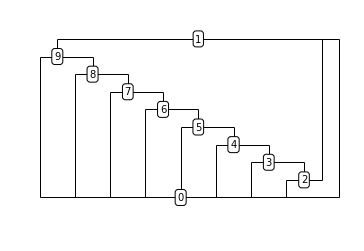

In [174]:
G=nx.wheel_graph(10) 
planarity.draw(G)
plt.axis('off')
plt.savefig('ejem.png') 

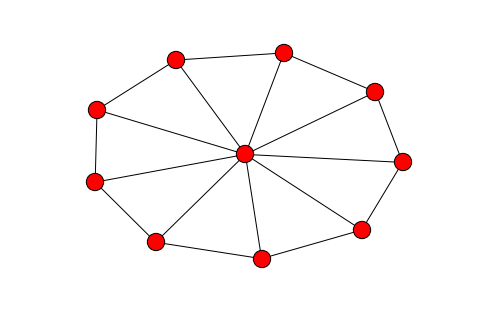

In [177]:
import networkx as nx
G=nx.wheel_graph(10) 
nx.set_node_attributes(G,'color','cyan')
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
nx.draw(G, show='ipynb',layout='circular')

In [178]:
is_planar(G)

True

In [179]:
import nxpd

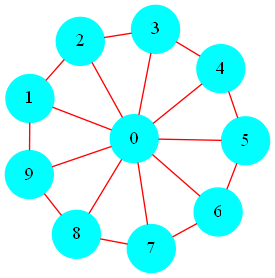

In [180]:
nx.set_node_attributes(G,'color','cyan')
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
nxpd.draw(G, layout='neato',show='ipynb')

# Coloración de grafos

In [181]:
G = nx.dodecahedral_graph()

In [182]:
coloring=nx.coloring.greedy_color(G,strategy=nx.coloring.strategy_largest_first)

numbers=[coloring[i] for i in G.nodes()]
colors=['Blue','Yellow','Red','Green','Cyan','Magenta','Lime','Gray','DarkBlue','DarkCyan',
'DarkGoldenrod','DarkGray','DarkGreen','DarkKhaki','DarkMagenta',
'DarkOliveGreen','DarkOrange','DarkOrchid','DarkSalmon','DarkSeaGreen','DarkSlateBlue','DarkRed',
'DarkSlateGray','DarkTurquoise','DarkViolet''LightBlue','LightCoral','LightCyan',
'LightGoldenrodYellow','LightGreen','LightGrey','LightPink','LightSalmon','LightSeaGreen',
'LightSkyBlue','LightSlateGray','LightSteelBlue','LightYellow','AliceBlue','AntiqueWhite','Aqua',
'Aquamarine','Azure','Beige','Bisque','BlanchedAlmond','BlueViolet',
'Brown','BurlyWood','CadetBlue','Chartreuse','Chocolate','Coral','CornflowerBlue','Cornsilk',
'Crimson','DeepPink','DeepSkyBlue','DimGray','DodgerBlue','FireBrick','FloralWhite',
'ForestGreen','Fuchsia','Gainsboro','GhostWhite','Gold','Goldenrod','GreenYellow',
'Honeydew','HotPink','IndianRed','Indigo','Ivory','Khaki','Lavender','LavenderBlush','LawnGreen',
'LemonChiffon','LimeGreen','Linen','Maroon','MediumAquamarine','MediumBlue',
'MediumOrchid','MediumPurple','MediumSeaGreen','MediumSlateBlue','MediumSpringGreen',
'MediumTurquoise','MediumVioletRed','MidnightBlue','MintCream','MistyRose',
'Moccasin','NavajoWhite','Navy','OldLace','live','OliveDrab','Orange','OrangeRed','Orchid',
'PaleGoldenrod','PaleGreen','PaleTurquoise','PaleVioletRed','PapayaWhip','PeachPuff','Peru','Pink',
'Plum','PowderBlue','Purple','RosyBrown','RoyalBlue','SaddleBrown','Salmon',
'SandyBrown','SeaGreen','Seashell','Sienna','Silver','SkyBlue','SlateBlue','SlateGray','Snow',
'SpringGreen','SteelBlue','Tan','Teal','Thistle','Tomato','Turquoise','Violet','Wheat','White',
'WhiteSmoke','Yellow','YellowGreen','Black']
tocolor = {}
for number, color in zip(numbers,colors):
    tocolor[number] = color
colors = colors[:len(G)] 
node_color=[tocolor[i] for i in numbers]
colora=dict(zip(G.nodes(),node_color))

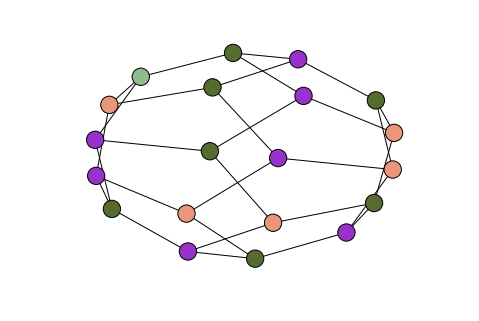

In [183]:
nx.draw(G,node_color = node_color)

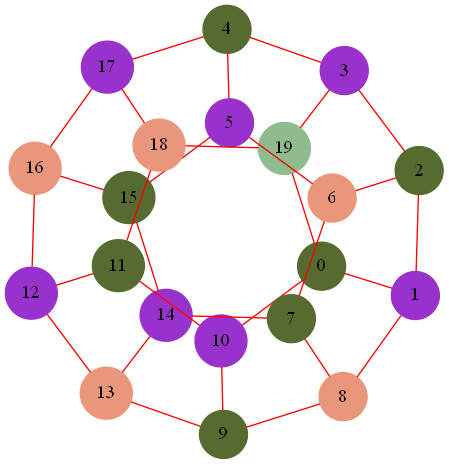

In [184]:
import nxpd
nx.set_node_attributes(G,'color',colora)
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
nxpd.draw(G,layout='neato',show='ipynb')

# Mapas y grafos con peso

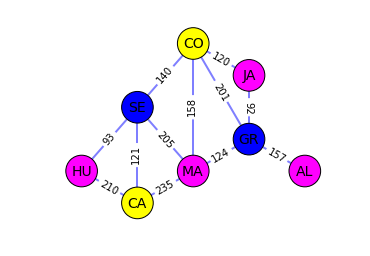

In [185]:
G = nx.Graph()
#G.add_nodes_from(['AL','GR','JA','MA','CO','SE','CA','HU'])
G.add_weighted_edges_from([('AL','GR',157),('GR','JA',92),('GR','CO',201),
                  ('GR','MA',124),('CO','MA',158),('CO','JA',120),
                  ('CO','SE',140),('MA','SE',205),('MA','CA',235),
                  ('SE','CA',121),('SE','HU',93),('CA','HU',210)])

edge_labels=nx.get_edge_attributes(G,'weight')
posi={'AL':'5,1!','GR':'4,1.5!','JA':'4,2.5!','MA':'3,1!','CO':'3,3!','SE':'2,2!','CA':'2,0.5!','HU':'1,1!'}
pos={'AL':(5,1),'GR':(4,1.5),'JA':(4,2.5),'MA':(3,1),'CO':(3,3),'SE':(2,2),'CA':(2,0.5),'HU':(1,1)}
#pos=nx.circular_layout(G)
coloring=nx.coloring.greedy_color(G,strategy=nx.coloring.strategy_largest_first)

numbers=[coloring[i] for i in G.nodes()]
colors=['Gray','Cyan','Red','Green','Yellow','Magenta','Lime','Blue','DarkBlue','DarkCyan',
'DarkGoldenrod','DarkGray','DarkGreen','DarkKhaki','DarkMagenta',
'DarkOliveGreen','DarkOrange','DarkOrchid','DarkSalmon','DarkSeaGreen','DarkSlateBlue','DarkRed',
'DarkSlateGray','DarkTurquoise','DarkViolet''LightBlue','LightCoral','LightCyan',
'LightGoldenrodYellow','LightGreen','LightGrey','LightPink','LightSalmon','LightSeaGreen',
'LightSkyBlue','LightSlateGray','LightSteelBlue','LightYellow','AliceBlue','AntiqueWhite','Aqua',
'Aquamarine','Azure','Beige','Bisque','BlanchedAlmond','BlueViolet',
'Brown','BurlyWood','CadetBlue','Chartreuse','Chocolate','Coral','CornflowerBlue','Cornsilk',
'Crimson','DeepPink','DeepSkyBlue','DimGray','DodgerBlue','FireBrick','FloralWhite',
'ForestGreen','Fuchsia','Gainsboro','GhostWhite','Gold','Goldenrod','GreenYellow',
'Honeydew','HotPink','IndianRed','Indigo','Ivory','Khaki','Lavender','LavenderBlush','LawnGreen',
'LemonChiffon','LimeGreen','Linen','Maroon','MediumAquamarine','MediumBlue',
'MediumOrchid','MediumPurple','MediumSeaGreen','MediumSlateBlue','MediumSpringGreen',
'MediumTurquoise','MediumVioletRed','MidnightBlue','MintCream','MistyRose',
'Moccasin','NavajoWhite','Navy','OldLace','live','OliveDrab','Orange','OrangeRed','Orchid',
'PaleGoldenrod','PaleGreen','PaleTurquoise','PaleVioletRed','PapayaWhip','PeachPuff','Peru','Pink',
'Plum','PowderBlue','Purple','RosyBrown','RoyalBlue','SaddleBrown','Salmon',
'SandyBrown','SeaGreen','Seashell','Sienna','Silver','SkyBlue','SlateBlue','SlateGray','Snow',
'SpringGreen','SteelBlue','Tan','Teal','Thistle','Tomato','Turquoise','Violet','Wheat','White',
'WhiteSmoke','Yellow','YellowGreen','Black']
tocolor = {}
tocolor = {}
for number, color in zip(numbers,colors):
    tocolor[number] = color
colors = colors[:len(G)] 
node_color=[tocolor[i] for i in numbers]
colora=dict(zip(G.nodes(),node_color))

nx.draw_networkx_nodes(G,pos,node_size=1000,node_color=node_color)
nx.draw_networkx_labels(G,pos,font_size=14)
nx.draw_networkx_edges(G,pos,width=2,alpha=0.5,edge_color='blue')
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels)
plt.axis('off')
plt.savefig("andalucia.png") # save as png
plt.show()

In [186]:
list(nx.all_simple_paths(G,'GR','CA'))

[['GR', 'JA', 'CO', 'MA', 'CA'],
 ['GR', 'JA', 'CO', 'MA', 'SE', 'CA'],
 ['GR', 'JA', 'CO', 'MA', 'SE', 'HU', 'CA'],
 ['GR', 'JA', 'CO', 'SE', 'CA'],
 ['GR', 'JA', 'CO', 'SE', 'HU', 'CA'],
 ['GR', 'JA', 'CO', 'SE', 'MA', 'CA'],
 ['GR', 'MA', 'CA'],
 ['GR', 'MA', 'SE', 'CA'],
 ['GR', 'MA', 'SE', 'HU', 'CA'],
 ['GR', 'MA', 'CO', 'SE', 'CA'],
 ['GR', 'MA', 'CO', 'SE', 'HU', 'CA'],
 ['GR', 'CO', 'MA', 'CA'],
 ['GR', 'CO', 'MA', 'SE', 'CA'],
 ['GR', 'CO', 'MA', 'SE', 'HU', 'CA'],
 ['GR', 'CO', 'SE', 'CA'],
 ['GR', 'CO', 'SE', 'HU', 'CA'],
 ['GR', 'CO', 'SE', 'MA', 'CA']]

In [187]:
nx.shortest_path(G,source='GR',target='CA',weight='weight')

['GR', 'MA', 'CA']

In [188]:
nx.degree(G)

{'AL': 1, 'CA': 3, 'CO': 4, 'GR': 4, 'HU': 2, 'JA': 2, 'MA': 4, 'SE': 4}

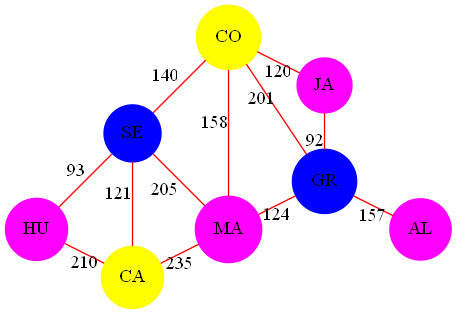

In [189]:
import nxpd
nx.set_node_attributes(G,'pos',posi)
nx.set_node_attributes(G,'color',colora)
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
nx.set_edge_attributes(G,'label',edge_labels)
nxpd.draw(G,layout='neato',show='ipynb')

# Grafo dirigido

En la siguiente figura hemos representado el recorrido de una línea de metro con sus respectivas paradas:

In [190]:
import nxpd

In [191]:
G=nx.DiGraph({1:[2,6],2:[3,5],3:[7],4:[1,3],5:[1],6:[4],7:[4]})

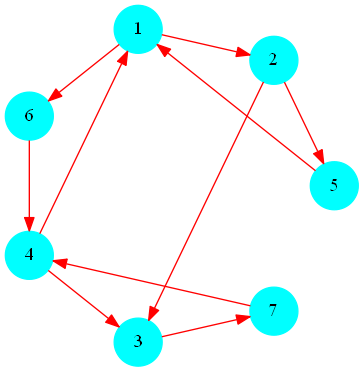

In [192]:
nx.set_node_attributes(G,'color','cyan')
#nx.set_node_attributes(G,'colorscheme','set39')
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
nxpd.draw(G, layout='circo',show='ipynb')

In [193]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]], dtype=int32)

In [194]:
list(nx.all_simple_paths(G,6,2))

[[6, 4, 1, 2]]

In [195]:
nx.shortest_path(G,source=6,target=2)

[6, 4, 1, 2]

# Dibujo de grafos

In [196]:
import matplotlib.pyplot as plt
import networkx as nx

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

def nx_draw(G, labels=None, graph_layout='circular',node_size=1000,node_alpha=1,#0.3,
               node_text_size=12, edge_color='red', edge_alpha=1, #0.3, 
               edge_tickness=2, edge_text_pos=0.5, text_font='sans-serif'):

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G) 
    # coloring graph
    if nx.is_bipartite(G):
        coloring=nx.bipartite.color(G)     
    else:
        coloring=nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
    numbers=[coloring[i] for i in G.nodes()]
    colors=['Blue','Cyan','Red','Green','Yellow','Magenta','Lime','Gray','LimeGreen','Salmon',
            'Lavender','DarkBlue','DarkCyan','DarkGoldenrod','DarkGray','DarkGreen','DarkKhaki',
            'DarkMagenta','DarkOliveGreen','DarkOrange','DarkOrchid','DarkSalmon','DarkSeaGreen',
            'DarkSlateBlue','DarkRed','DarkSlateGray','DarkTurquoise','DarkViolet''LightBlue',
            'LightCoral','LightCyan','LightGoldenrodYellow','LightGreen','LightGrey','LightPink',
            'LightSalmon','LightSeaGreen','LightSkyBlue','LightSlateGray','LightSteelBlue',
            'LightYellow','AliceBlue','AntiqueWhite','Aqua','Aquamarine','Azure','Beige','Bisque',
            'BlanchedAlmond','BlueViolet','Brown','BurlyWood','CadetBlue','Chartreuse','Chocolate',
            'Coral','CornflowerBlue','Cornsilk','Crimson','DeepPink','DeepSkyBlue','DimGray',
            'DodgerBlue','FireBrick','FloralWhite','ForestGreen','Fuchsia','Gainsboro','GhostWhite',
            'Gold','Goldenrod','GreenYellow','Honeydew','HotPink','IndianRed','Indigo','Ivory',
            'Khaki','LavenderBlush','LawnGreen','LemonChiffon','Linen','Maroon','MediumAquamarine',
            'MediumBlue','MediumOrchid','MediumPurple','MediumSeaGreen','MediumSlateBlue',
            'MediumSpringGreen','MediumTurquoise','MediumVioletRed','MidnightBlue','MintCream',
            'MistyRose','Moccasin','NavajoWhite','Navy','OldLace','live','OliveDrab','Orange',
            'OrangeRed','Orchid','PaleGoldenrod','PaleGreen','PaleTurquoise','PaleVioletRed',
            'PapayaWhip','Peach','SandyBrown','SeaGreen','Seashell','Sienna','Silver','SkyBlue',
            'SlateBlue','SlateGray','Snow','SpringGreen','SteelBlue','Tan','Teal','Thistle',
            'Tomato','Turquoise','Violet','Wheat','White','WhiteSmoke','Yellow','YellowGreen',
            'Black']
    tocolor = {}
    for number, color in zip(numbers,colors):
        tocolor[number] = color
    colors = colors[:len(G)] 
    node_color=[tocolor[i] for i in numbers]
        
    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)#,cmap=plt.cm.brg)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    if labels is None:
        labels = []#range(1,len(G)+1)

    edge_labels = dict(zip(G.edges(), labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)
    plt.axis('off')
    plt.savefig("name.png") # save as png
    plt.show() 

In [197]:
import networkx as nx
import nxpd
def nxpd_draw(G):
    # coloring graph
    if nx.is_bipartite(G):
        coloring=nx.bipartite.color(G)     
    else:
        coloring=nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
    numbers=[coloring[i] for i in G.nodes()]
    colors=['Blue','Cyan','Red','Green','Yellow','Magenta','Lime','Gray','LimeGreen','Salmon',
            'Lavender','DarkBlue','DarkCyan','DarkGoldenrod','DarkGray','DarkGreen','DarkKhaki',
            'DarkMagenta','DarkOliveGreen','DarkOrange','DarkOrchid','DarkSalmon','DarkSeaGreen',
            'DarkSlateBlue','DarkRed','DarkSlateGray','DarkTurquoise','DarkViolet''LightBlue',
            'LightCoral','LightCyan','LightGoldenrodYellow','LightGreen','LightGrey','LightPink',
            'LightSalmon','LightSeaGreen','LightSkyBlue','LightSlateGray','LightSteelBlue',
            'LightYellow','AliceBlue','AntiqueWhite','Aqua','Aquamarine','Azure','Beige','Bisque',
            'BlanchedAlmond','BlueViolet','Brown','BurlyWood','CadetBlue','Chartreuse','Chocolate',
            'Coral','CornflowerBlue','Cornsilk','Crimson','DeepPink','DeepSkyBlue','DimGray',
            'DodgerBlue','FireBrick','FloralWhite','ForestGreen','Fuchsia','Gainsboro','GhostWhite',
            'Gold','Goldenrod','GreenYellow','Honeydew','HotPink','IndianRed','Indigo','Ivory',
            'Khaki','LavenderBlush','LawnGreen','LemonChiffon','Linen','Maroon','MediumAquamarine',
            'MediumBlue','MediumOrchid','MediumPurple','MediumSeaGreen','MediumSlateBlue',
            'MediumSpringGreen','MediumTurquoise','MediumVioletRed','MidnightBlue','MintCream',
            'MistyRose','Moccasin','NavajoWhite','Navy','OldLace','live','OliveDrab','Orange',
            'OrangeRed','Orchid','PaleGoldenrod','PaleGreen','PaleTurquoise','PaleVioletRed',
            'PapayaWhip','Peach','SandyBrown','SeaGreen','Seashell','Sienna','Silver','SkyBlue',
            'SlateBlue','SlateGray','Snow','SpringGreen','SteelBlue','Tan','Teal','Thistle',
            'Tomato','Turquoise','Violet','Wheat','White','WhiteSmoke','Yellow','YellowGreen',
            'Black']
    tocolor = {}
    for number, color in zip(numbers,colors):
        tocolor[number] = color
    colors = colors[:len(G)] 
    node_color=[tocolor[i] for i in numbers]
    colora=dict(zip(G.nodes(),node_color))
    nx.set_node_attributes(G,'color',colora)
    nx.set_node_attributes(G,'shape','circle')
    nx.set_node_attributes(G,'style','filled')
    nx.set_edge_attributes(G,'color','red')
    return nxpd.draw(G,layout='neato',format='png',show='ipynb')

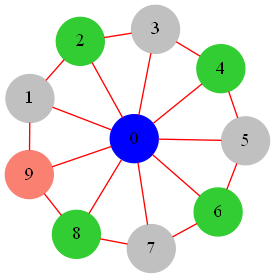

In [199]:
nxpd_draw(nx.wheel_graph(10))